### Principal Component Analysis

PCA is the process of figuring out the most important features ornprincipak components that has the most impactful on the target variable.

Importance of PCA 

1.  faste training and inference
2. data visualization becomes easier

PCA is called dimensionality reduction technique as it can help us reduce dimensions

In [69]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

In [70]:
#Loading Dataset
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Exploratory Data Analysis

In [71]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Data Pre-Processing

In [73]:
#Missing Values
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [74]:
# Converting Categorical Variables to Binary (0s and 1s)
df['Sex'] = df['Sex'].replace({'M': 1, 'F': 0})
df['ChestPainType'] = df['ChestPainType'].replace({'ASY': 0, 'NAP': 1, 'ATA': 2, 'TA': 3})  # Example mapping
df['RestingECG'] = df['RestingECG'].replace({'Normal': 0, 'ST': 1, 'LVH': 2})
df['ExerciseAngina'] = df['ExerciseAngina'].replace({'N': 1, 'Y': 0})
df['ST_Slope'] = df['ST_Slope'].replace({'Up': 0, 'Flat': 1, 'Down': 2})

# Display the updated DataFrame
df.head()

C:\Users\HomePC\AppData\Local\Temp\ipykernel_21040\115681181.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace({'M': 1, 'F': 0})
C:\Users\HomePC\AppData\Local\Temp\ipykernel_21040\115681181.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['ChestPainType'] = df['ChestPainType'].replace({'ASY': 0, 'NAP': 1, 'ATA': 2, 'TA': 3})  # Example mapping
C:\Users\HomePC\AppData\Local\Temp\ipykernel_21040\115681181.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,2,140,289,0,0,172,1,0.0,0,0
1,49,0,1,160,180,0,0,156,1,1.0,1,1
2,37,1,2,130,283,0,1,98,1,0.0,0,0
3,48,0,0,138,214,0,0,108,0,1.5,1,1
4,54,1,1,150,195,0,0,122,1,0.0,0,0


Visualizations

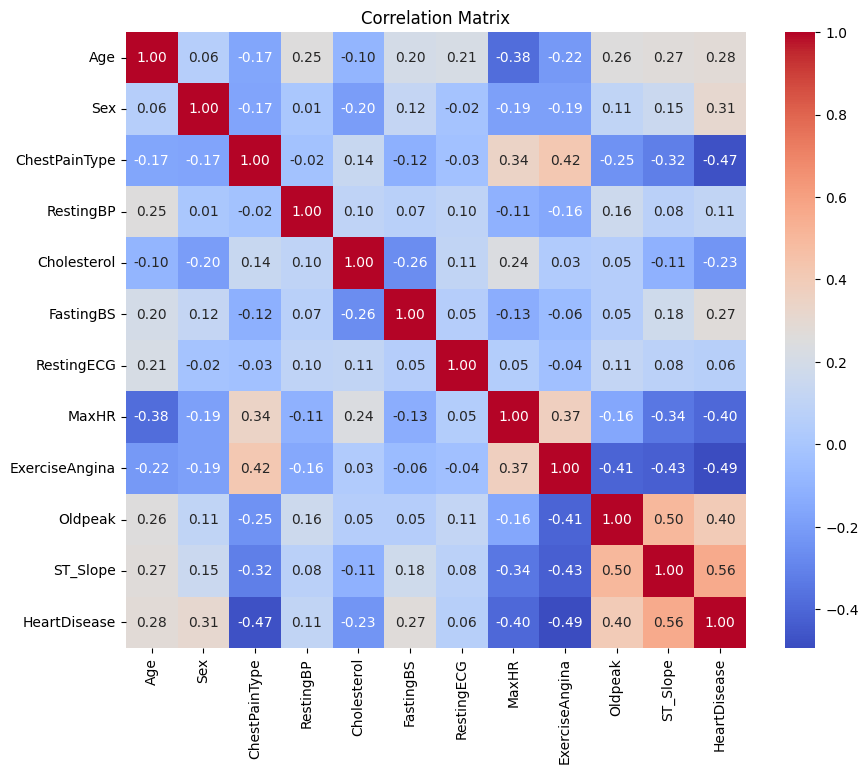

In [75]:
#Correlation
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

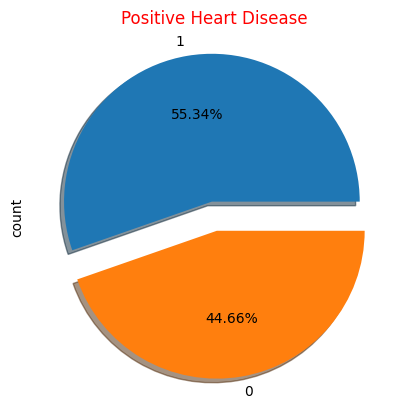

In [76]:
#Pie Chart of Positive
df['HeartDisease'].value_counts().plot.pie(explode=[0.1, 0.1],
                                     autopct='%1.2f%%',
                                     shadow=True)
plt.title('Positive Heart Disease',color='Red',loc='center');

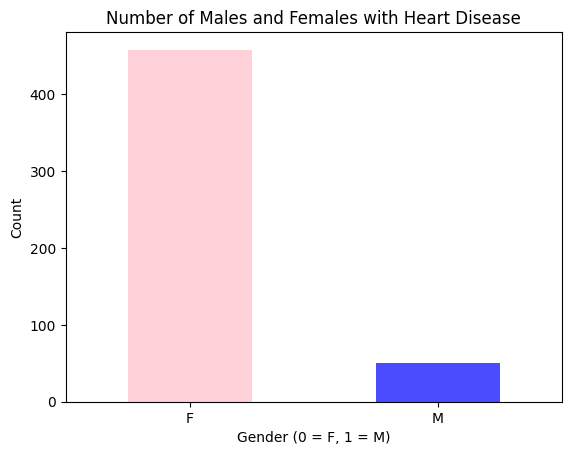

In [77]:
# Filter the data for individuals with heart disease
heart_disease_data = df[df['HeartDisease'] == 1]  # Replace 'HeartDisease' with the actual column name

# Count the number of males and females with heart disease
gender_counts = heart_disease_data['Sex'].value_counts()  # Replace 'Sex' with the actual column name for gender

# Plot the bar graph
gender_counts.plot(kind='bar', color=['Pink', 'Blue'], alpha=0.7)
plt.title('Number of Males and Females with Heart Disease')
plt.xlabel('Gender (0 = F, 1 = M)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['F', 'M'], rotation=0)
plt.show()

Splitting and Training

In [78]:
#Defining Features and Target
X = df.drop(['HeartDisease'],axis=1) 
y = df['HeartDisease']
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,2,140,289,0,0,172,1,0.0,0
1,49,0,1,160,180,0,0,156,1,1.0,1
2,37,1,2,130,283,0,1,98,1,0.0,0
3,48,0,0,138,214,0,0,108,0,1.5,1
4,54,1,1,150,195,0,0,122,1,0.0,0


In [79]:
#Standard Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.4331398 ,  0.51595242,  1.34508565, ...,  0.8235563 ,
        -0.83243239, -1.05211381],
       [-0.47848359, -1.93816322,  0.27042192, ...,  0.8235563 ,
         0.10566353,  0.59607813],
       [-1.75135854,  0.51595242,  1.34508565, ...,  0.8235563 ,
        -0.83243239, -1.05211381],
       ...,
       [ 0.37009972,  0.51595242, -0.80424181, ..., -1.21424608,
         0.29328271,  0.59607813],
       [ 0.37009972, -1.93816322,  1.34508565, ...,  0.8235563 ,
        -0.83243239,  0.59607813],
       [-1.64528563,  0.51595242,  0.27042192, ...,  0.8235563 ,
        -0.83243239, -1.05211381]], shape=(918, 11))

In [80]:
#Splitting our data into training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

Modeling

In [81]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)

Model Evaluation

In [82]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)
roc_auc = round(roc_auc_score(Y_pred, y_test)* 100, 2)
P_Score = round(precision_score(Y_pred, y_test)* 100, 2)


print("Training Accuracy    :",log_train)
print("Model Accuracy Score :",log_accuracy)
print("ROC AUC Score       :",roc_auc)
print("Precision Score     :",P_Score)

Training Accuracy    : 85.97
Model Accuracy Score : 84.24
ROC AUC Score       : 83.95
Precision Score     : 81.31


PCA

In [83]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,2,140,289,0,0,172,1,0.0,0
1,49,0,1,160,180,0,0,156,1,1.0,1
2,37,1,2,130,283,0,1,98,1,0.0,0
3,48,0,0,138,214,0,0,108,0,1.5,1
4,54,1,1,150,195,0,0,122,1,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,0,132,1,1.2,1
914,68,1,0,144,193,1,0,141,1,3.4,1
915,57,1,0,130,131,0,0,115,0,1.2,1
916,57,0,2,130,236,0,2,174,1,0.0,1


In [84]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
X_pca = pca.fit_transform(X)
X_pca

array([[ 92.31180478,  29.45291526],
       [-17.14365455,  13.74197629],
       [ 81.90830937, -38.21170962],
       ...,
       [-69.00495725, -17.3379508 ],
       [ 39.20883944,  33.60632249],
       [-21.43759782,  37.21471873]], shape=(918, 2))

In [85]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [86]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_pca, y_train)
Y_pred = logreg.predict(X_test_pca)

In [87]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
log_train = round(logreg.score(X_train_pca, y_train) * 100, 2)
log_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)
roc_auc = round(roc_auc_score(Y_pred, y_test)* 100, 2)
P_Score = round(precision_score(Y_pred, y_test)* 100, 2)


print("Training Accuracy    :",log_train)
print("Model Accuracy Score :",log_accuracy)
print("ROC AUC Score       :",roc_auc)
print("Precision Score     :",P_Score)

Training Accuracy    : 70.03
Model Accuracy Score : 63.59
ROC AUC Score       : 63.11
Precision Score     : 64.49
